# Computer Vision & Deep Learning - SEP Practical

## Exercise Sheet 1: Introduction to Python and K-means clustering

**Due on 31.10.2024, 10:00**

## Important notes

- Email: Frequently check your email address registered for Moodle. All notifications regarding the course will be sent via Moodle.
- Moodle: Please use the Moodle platform and post your questions to the forum. They will be answered by us or your fellow students.
-  Submission: Put your code and potentially other materials inside a single ZIP file. Both PDF file for the Python notebook and ZIP file should contain your surname and your matriculation number (Surname-MatriculationNumber.zip). Submissions that fail to follow the naming convention will not be graded!

**Please only use pure python for this exercise. No other libraries are allowed (except `matplotlib` for visualization purposes)!**


In this exercise we want you to get familiar with `Python` and already implement your first machine learning algorithm. In the lecture we have learned a very famous unsupervised algorithm for clustering data, called K-Means.

## 1. Data (5)

### 1.1 Read Data (3)
As a first step, please load the datapoints from the given `cluster_data.txt` file using the inbuilt `open()` function. Note that for each line you need to split that line into numbers and convert them to type `float` with the inbuilt `float(...)` function for further processing.

In [5]:
def read_data(filepath):
    # TODO: read the file and store the datapoints in a list
    with open(file=filepath, mode="r", encoding="UTF-8") as file:
        data = []
        for line in file.readlines():
            line = line.strip()
            line = line.split(",")
            line = [float(n) for n in line]
            data.append(line)
        return data


### 1.2 Print Data (1)

Please read the data and print the first $5$ elements of it.

In [6]:
from pprint import pprint
filepath = "cluster_data.txt"
data = read_data(filepath)
pprint(data)

[[-2.672217304042017, -4.101281486217399],
 [-8.039282818227496, 2.8319065022588026],
 [3.3645318481024713, 0.31055081545006236],
 [0.5534653004366121, 1.8002979493400275],
 [-5.740691049309148, 3.9577428483393575],
 [2.821585712049796, 1.0052926462993608],
 [-6.239604058661737, -3.5985009449097127],
 [5.594058272811516, 1.7243685048699646],
 [-3.81607450565969, -4.3854897603756084],
 [6.67057045031091, 0.2924943024894231],
 [-4.056133020448757, -4.001385042735095],
 [-7.079141176219181, 4.318727652943021],
 [-5.83676405071931, 5.336527949436392],
 [-4.023423105021452, -2.920805271887511],
 [2.2804417053162958, 0.00687638907041932],
 [1.8640502993216792, 2.1368913626026957],
 [-8.098452524425433, 3.3365217136378926],
 [6.448195284423313, 2.6961815728281606],
 [4.357034706469391, 0.5939282037401681],
 [-7.603993287338355, 2.906938491269494],
 [-7.845052574303084, 4.378162519602173],
 [-8.803409664173842, 3.3104502222497993],
 [7.370989006291121, 0.4901567578615209],
 [6.364481249240505,

### 1.3 Visualize Data (1)

For visualization we use the canonical [matplotlib](https://matplotlib.org/stable/api/) package. Please familiarize yourself with this package, even though we provide you with a visualization function for now. We will for sure need it in a later stage.

The provided function accepts the data as input and optionally labels and centroids, which we will need for later. Now, please just visualize the data with this function and leave out the `centroids` and `labels`.

In [7]:
import matplotlib.pyplot as plt

colors = ["g", "y", "c", "m", "b", "r", "k"]
def visualize_data(data, centroids=None, labels=None, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    if labels is not None:
        color_data = [colors[x] for x in labels]
        if centroids is not None:
            color_centroid = colors[:len(centroids)]
    else:
        color_data = color_centroid = "C0"

    # plot the data
    plt.scatter([x[0] for x in data], [x[1] for x in data], c=color_data, s=20)

    # plot the centroids if they are given
    if centroids is not None:
        plt.scatter(
            [x[0] for x in centroids],
            [x[1] for x in centroids],
            c=color_centroid, marker="X",
            s=80, linewidths=1, edgecolors="k"
        )

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

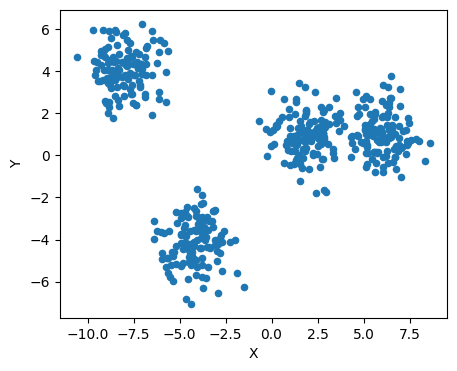

In [8]:
# TODO: please visualize the data by using the function given above
visualize_data(data)

## 2. Distance Function (2)

As we have learned in the lecture, we need some kind of metric to represent (dis-)similarity between data points. For now we will use the Euclidean distance, which is defined for two points $p$ and $q$ with dimension $n$ as

$$
d(p, q) = \sqrt{\sum^n_{i=1} (p_i-q_i)^2}
$$

Please follow the function signature from below and complete the syntax, so that the function returns the Euclidean distance of two points. For now it is sufficient if you implement it for points $x \in \mathbb{R}^2$.

In [ ]:
def euclidean_distance(point1, point2):
    # TODO: please implement the euclidean distance for two 2D points.
    distance = 0
    for i, j in zip(point1, point2):
        distance += (i - j)**2
    distance = distance**0.5
    return distance

## 3. K-means Algorithm (6)

The general procedure of the K-means algorithm is as follows:

1. You initialize the algorithm with $k$ different centroids. The hyper-parameter $k$ represents the number of clusters you assume in your dataset.
2. For each data point you assign the cluster with the nearest representative/centroid.
3. Based on the previously computed cluster assignments, you compute new centroids.

You repeat from step $2$ until the centroids do not change anymore and the algorithm has converged.

Below you find a class `KMeans` that is initialized with a list of centroids. It implements two functions, `assign_clusters` and `compute_new_centroids`, which represent step 2. and 3. from above. Please implement the missing parts of this class. Only use pure python and the `euclidean_distance` function from above.

In [6]:
class KMeans:
    def __init__(self, centroids):
        """
        Performs K-Means clustering given a set of centroids.

        Args:
            centroids: A list of centroids.
        """
        self.centroids = centroids

    def assign_clusters(self, data):
        """
        Given data, assign cluster labels to each data point.

        Args:
            data: A list of 2D data points, e.g. [[1.2, 4.2], [3.1, 2.1], ...]
        Returns:
            labels: A list of cluster assignments, e.g. [0, 1, 2, 0, ...]
        """
        # TODO: implement the assigment of clusters based on the distance
        ...
        # ################################################################


    def compute_centroids(self, data, labels):
        """
        Given data and labels, compute new centroids as the mean of the data points.

        Args:
            data: A list of 2D data points, e.g. [[1.2, 4.2], [3.1, 2.1], ...]
            labels: A list of cluster assignments, e.g. [0, 1, 2, 0, ...]
        Returns:
            next_centroids: A list of new centroids, also assigned to `self.centroids`
                before it is returned.
        """
        next_centroids = []

        # TODO: compute the next centroids based on the labels
        ...
        # ################################################################

        self.centroids = next_centroids
        return next_centroids

## 4. Learning from Data (7)

### 4.1 Training loop (4)

Now we have everything together for setting up the training loop. Please perform k-means clustering for 4 epochs on the data with the three given centroids. After each step (cluster assignment and new centroid computation), visualize the data, including labels and centroids.


In [6]:
init_centroids = [
    [0, 0], [1, 1], [2, 2]
]

# TODO: run the algorithm initialized with init_centroids

### 4.2 Results (1)

What do you observe here? Do you see any problems? What are these problems and what do you need to change in order to get a better clustering of your data?

**Answer**: TODO...

### 4.3 Hyper-parameter tuning (2)

In machine learning we have the so-called hyper-parameters. These are parameters we need to tune in order to get good results. For k-means we have a single hyper-parameter $k$ that defines how many centroids we use to initialize our algorithm. Below you find a function that returns randomly initialized centroids, given the parameter $k$. Under the hood it uses a very important package called [numpy](https://numpy.org/doc/stable/index.html), which we will further get to know in the upcoming lectures. Feel free to already get familiar with it.

In [8]:
import numpy as np

def get_random_centroids(k):
    np.random.seed(42 + k)
    return (np.random.randn(k, 2) * 4).tolist()

print(get_random_centroids(2))

[[-3.0024588690234912, 5.265429298847278], [4.984560114573721, -6.4196629650343775]]


In [9]:
# TODO

Which hyper-parameter would you choose? ;)

---